## We want to change Barbara's eyes to green. I know it's wrong but let's humour ourselves.


In [6]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

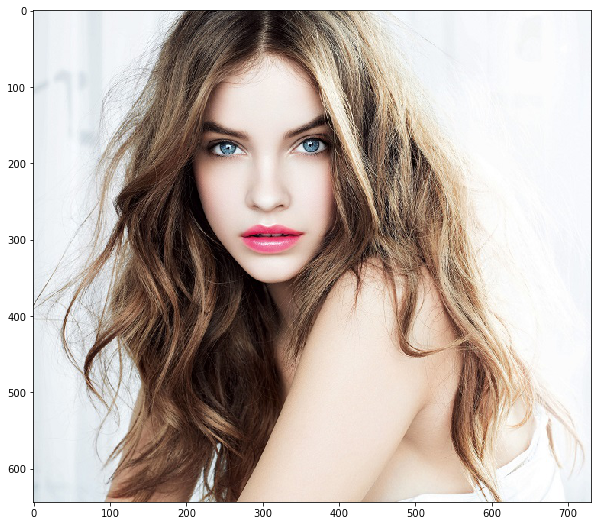

In [9]:
photo_data = misc.imread('./BarbaraPalvin.jpg')

%matplotlib inline
plt.figure(figsize=(10, 10))
plt.imshow(photo_data)

### Let's do some basic checks and find out some info about the blue colour

In [16]:
print("Type: ", type(photo_data), "\nDims:", photo_data.shape, "\nSize: ", photo_data.size)

# Check colour range is alright:
print("RGB Colour Range: ", photo_data.min(), photo_data.max())

print("Red: ", photo_data[:, :, 0].min(), photo_data[:, :, 0].max(), photo_data[:, :, 0].mean())
print("Green: ", photo_data[:, :, 1].min(), photo_data[:, :, 1].max(), photo_data[:, :, 1].mean())
print("Blue: ", photo_data[:, :, 2].min(), photo_data[:, :, 2].max(), photo_data[:, :, 2].mean())

Type:  <class 'numpy.ndarray'> 
Dims: (644, 731, 3) 
Size:  1412292
RGB Colour Range:  0 255
Red:  0 255 186.622443517
Green:  0 255 173.022059886
Blue:  0 255 164.895854398


#### The eyes appear to be within (150:200, 200: 400). So let's find the colour information within that range

In [47]:
temp = photo_data[150:200, 200:400, :]
temp.shape
print("Red: ", temp[:,:,0].min(), temp[:,:,0].max(), temp[:,:,0].mean())
print("Green: ", temp[:,:,1].min(), temp[:,:,1].max(), temp[:,:,1].mean())
print("Blue: ", temp[:,:, 2].min(), temp[:,:, 2].max(), temp[:,:, 2].mean())


Red:  0 255 148.625
Green:  0 255 128.3054
Blue:  0 255 120.0453


#### Now let's create a mask for the range of blue in the photo

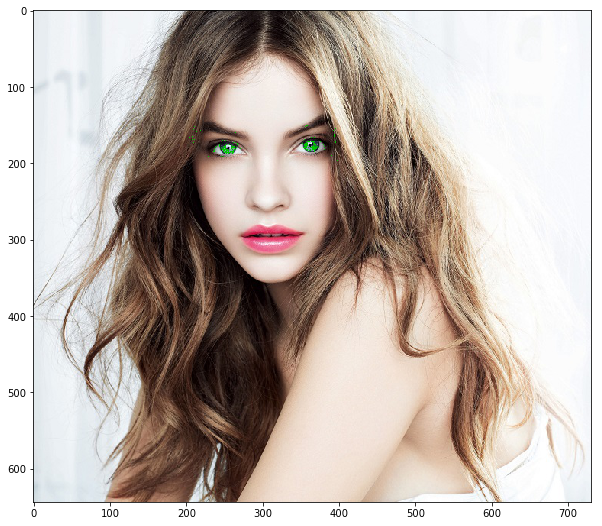

In [60]:
photo_data = misc.imread('./BarbaraPalvin.jpg')

# Prep location mask
total_rows, total_cols, layer = photo_data.shape

top = 150
bottom = 200
left = 200
right = 400

height_arr = np.arange(0, total_rows)
width_arr = np.arange(0, total_cols)

height_mask = np.logical_and(height_arr >= top, height_arr <= bottom)
width_mask = np.logical_and(width_arr >= left, width_arr <= right)
coord_mask = np.outer(height_mask, width_mask)

# Prep colour mask

# R: 66, G: 103, B: 112
# R:97, B:142, G:163
# R:53, G: 80, B: 109

red_mask = (photo_data[:, :, 0] > 50) & (photo_data[:, :, 0] < 110)
green_mask = (photo_data[:, :, 1] > 80) & (photo_data[:, :, 1] < 140)
blue_mask = (photo_data[:, :, 2] > 100) & (photo_data[:, :, 2] < 200)

colour_mask = np.logical_and(red_mask, green_mask, blue_mask)

final_mask = np.logical_and(coord_mask, colour_mask)

photo_data[final_mask] = [0, 200, 0]
#[52, 114, 53]

plt.figure(figsize=(10, 10))
plt.imshow(photo_data)

#### Well not perfect but Quod Erta Demonstradum